# trial_visit_info 2차 전처리 진행
- `first_enter_time` / `last_leave_time` 집중적으로 탐색
- `stay_time` / `stay_time_second` drop 후 진행

### `first_enter_time` / `last_leave_time` 같은 행 내에서 날짜가 바뀌는 행이 있는지

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nuwba\Desktop\Codeit_4\중급2_프로젝트\중급_2\trial_visit_info.csv")

df = df.drop(["stay_time", "stay_time_second"], axis=1)

df

,site_id,date,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594
...,...,...,...,...,...
11472,6,2022-06-16,2022-06-16 11:00:48.643935,2022-06-16 18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd
11473,6,2022-06-17,2022-06-17 17:15:05.221223,2022-06-17 18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
11474,6,2022-06-16,2022-06-16 12:52:46.557742,2022-06-16 18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
11475,6,2023-02-06,2023-02-06 10:14:00.538281,2023-02-06 16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b


In [2]:
df.isna().sum()

site_id               0
date                  0
first_enter_time    555
last_leave_time     555
user_uuid             0
dtype: int64

In [3]:
# first_enter_time, last_leave_time 중 하나라도 NaN이면 행 삭제
df_cleaned = df.dropna(subset=['first_enter_time', 'last_leave_time']).reset_index(drop=True)

print(f"삭제 전 행 수: {len(df)}")
print(f"삭제 후 행 수: {len(df_cleaned)}")
print(f"삭제된 행 수: {len(df) - len(df_cleaned)}")

삭제 전 행 수: 11477
삭제 후 행 수: 10922
삭제된 행 수: 555


### `first_enter_time` **→** `last_leave_time`  일자가 변경되는 행 수

In [4]:
df_cleaned

,site_id,date,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594
...,...,...,...,...,...
10917,6,2022-06-16,2022-06-16 11:00:48.643935,2022-06-16 18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd
10918,6,2022-06-17,2022-06-17 17:15:05.221223,2022-06-17 18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10919,6,2022-06-16,2022-06-16 12:52:46.557742,2022-06-16 18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10920,6,2023-02-06,2023-02-06 10:14:00.538281,2023-02-06 16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b


In [5]:
df_cleaned.isna().sum()

site_id             0
date                0
first_enter_time    0
last_leave_time     0
user_uuid           0
dtype: int64

In [6]:
df_cleaned["first_enter_time"]

0        2023-12-23 16:11:25.345793
1        2023-12-24 16:10:45.668026
2        2023-12-25 10:19:47.087268
3        2023-12-23 14:49:40.302823
4        2023-12-26 14:57:10.220793
                    ...            
10917    2022-06-16 11:00:48.643935
10918    2022-06-17 17:15:05.221223
10919    2022-06-16 12:52:46.557742
10920    2023-02-06 10:14:00.538281
10921    2022-04-20 13:24:06.222380
Name: first_enter_time, Length: 10922, dtype: object

In [7]:
df_cleaned["last_leave_time"]

0        2023-12-23 17:25:32.233995
1        2023-12-24 20:53:34.842447
2        2023-12-25 12:39:51.221372
3        2023-12-23 19:27:39.406803
4        2023-12-26 19:34:36.971542
                    ...            
10917    2022-06-16 18:23:38.495290
10918    2022-06-17 18:56:00.840639
10919    2022-06-16 18:23:34.355309
10920    2023-02-06 16:52:37.606175
10921           2022-04-20 23:59:59
Name: last_leave_time, Length: 10922, dtype: object

In [8]:
# first_enter_time 변환 불가 건수
invalid_first = pd.to_datetime(df_cleaned['first_enter_time'], errors='coerce').isna().sum()

# last_leave_time 변환 불가 건수
invalid_last = pd.to_datetime(df_cleaned['last_leave_time'], errors='coerce').isna().sum()

print(f"first_enter_time 변환 불가 건수: {invalid_first}")
print(f"last_leave_time 변환 불가 건수: {invalid_last}")

first_enter_time 변환 불가 건수: 798
last_leave_time 변환 불가 건수: 775


In [9]:
# 변환 시 NaT가 된 값만 추출
invalid_first_vals = df_cleaned.loc[
    pd.to_datetime(df_cleaned['first_enter_time'], errors='coerce').isna(),
    'first_enter_time'
].unique()

invalid_last_vals = df_cleaned.loc[
    pd.to_datetime(df_cleaned['last_leave_time'], errors='coerce').isna(),
    'last_leave_time'
].unique()

print("first_enter_time 변환 불가 예시:", invalid_first_vals[:20])
print("last_leave_time 변환 불가 예시:", invalid_last_vals[:20])

first_enter_time 변환 불가 예시: ['2023-12-27 14:56:00' '2023-12-31 00:00:00' '2023-12-29 00:00:00'
 '2023-12-21 00:00:00' '2023-12-28 00:00:00' '2023-12-30 00:00:00'
 '2023-12-26 00:00:00' '2022-05-15 00:00:00' '2022-08-02 00:00:00'
 '2023-08-20 00:00:00' '2023-08-19 00:00:00' '2022-12-26 12:50:54'
 '2021-09-23 00:00:00' '2021-12-11 20:40:00' '2021-11-18 00:00:00'
 '2021-10-09 00:00:00' '2021-10-21 00:00:00' '2023-03-01 00:00:00'
 '2022-11-26 00:00:00' '2021-10-05 00:00:00']
last_leave_time 변환 불가 예시: ['2023-12-30 23:59:59' '2023-12-20 23:59:59' '2023-12-27 23:59:59'
 '2023-12-29 23:59:59' '2023-12-28 23:59:59' '2023-12-31 23:59:59'
 '2023-12-25 23:59:59' '2022-05-14 23:59:59' '2023-08-19 23:59:59'
 '2023-08-18 23:59:59' '2021-09-22 23:59:59' '2021-10-08 23:59:59'
 '2021-10-20 23:59:59' '2022-03-30 23:59:59' '2023-02-28 23:59:59'
 '2021-10-04 23:59:59' '2021-12-21 23:59:59' '2021-11-29 23:59:59'
 '2021-12-05 23:59:59' '2021-12-27 23:59:59']


### 처리 아이디어
- 날짜는 존재하니 `first_enter_time` / `last_leave_time` 에는 시간만 남겨놓자

In [10]:
df_cleaned

,site_id,date,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,2023-12-23 16:11:25.345793,2023-12-23 17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,2023-12-24 16:10:45.668026,2023-12-24 20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,2023-12-25 10:19:47.087268,2023-12-25 12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,2023-12-23 14:49:40.302823,2023-12-23 19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,2023-12-26 14:57:10.220793,2023-12-26 19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594
...,...,...,...,...,...
10917,6,2022-06-16,2022-06-16 11:00:48.643935,2022-06-16 18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd
10918,6,2022-06-17,2022-06-17 17:15:05.221223,2022-06-17 18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10919,6,2022-06-16,2022-06-16 12:52:46.557742,2022-06-16 18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10920,6,2023-02-06,2023-02-06 10:14:00.538281,2023-02-06 16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b


In [11]:
# 문자열에서 공백 뒤(시간)만 추출
df_cleaned['first_enter_time'] = df_cleaned['first_enter_time'].astype(str).str.split().str[-1]
df_cleaned['last_leave_time']  = df_cleaned['last_leave_time'].astype(str).str.split().str[-1]

df_cleaned

,site_id,date,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,16:11:25.345793,17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,16:10:45.668026,20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,10:19:47.087268,12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,14:49:40.302823,19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,14:57:10.220793,19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594
...,...,...,...,...,...
10917,6,2022-06-16,11:00:48.643935,18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd
10918,6,2022-06-17,17:15:05.221223,18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10919,6,2022-06-16,12:52:46.557742,18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10920,6,2023-02-06,10:14:00.538281,16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b


In [12]:
def normalize_time_format(x):
    # NaN은 그대로 반환
    if pd.isna(x):
        return x
    
    # 문자열 변환
    x = str(x)
    
    # 23:59:59 처리 → .999999 붙이기
    if x == "23:59:59":
        return "23:59:59.999999"
    
    # 00:00:00 처리 → .000000 붙이기
    if x == "00:00:00":
        return "00:00:00.000000"
    
    # 마이크로초 없는 HH:MM:SS → .000000 붙이기
    if len(x) == 8:  # HH:MM:SS 형태
        return x + ".000000"
    
    # 이미 마이크로초 있는 값은 그대로
    return x

# 적용
df_cleaned['first_enter_time'] = df_cleaned['first_enter_time'].apply(normalize_time_format)
df_cleaned['last_leave_time']  = df_cleaned['last_leave_time'].apply(normalize_time_format)


In [13]:
df_cleaned.isna().sum()

site_id             0
date                0
first_enter_time    0
last_leave_time     0
user_uuid           0
dtype: int64

In [14]:
df_cleaned

,site_id,date,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,16:11:25.345793,17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,16:10:45.668026,20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,10:19:47.087268,12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,14:49:40.302823,19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,14:57:10.220793,19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594
...,...,...,...,...,...
10917,6,2022-06-16,11:00:48.643935,18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd
10918,6,2022-06-17,17:15:05.221223,18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10919,6,2022-06-16,12:52:46.557742,18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10920,6,2023-02-06,10:14:00.538281,16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b


#### 72시간 이상 사용 유저 확인

In [15]:
# 전체 유저 수
total_users = df_cleaned['user_uuid'].nunique()
print(f"총 유저 수: {total_users}")

# 2) 체류 시간 계산 (일별: last - first)
df_cleaned['first_enter_time_dt'] = pd.to_datetime(df_cleaned['date'].astype(str) + " " + df_cleaned['first_enter_time'])
df_cleaned['last_leave_time_dt'] = pd.to_datetime(df_cleaned['date'].astype(str) + " " + df_cleaned['last_leave_time'])
df_cleaned['stay_seconds'] = (df_cleaned['last_leave_time_dt'] - df_cleaned['first_enter_time_dt']).dt.total_seconds()

# 유저별 총 체류 시간 합계 (초 → 시간)
user_total_hours = df_cleaned.groupby('user_uuid')['stay_seconds'].sum() / 3600

# 72시간 이상 사용한 유저 수
over_72_users = (user_total_hours >= 72).sum()
print(f"72시간 이상 사용한 유저 수: {over_72_users}")

# 실제 유저 ID와 사용 시간 보고 싶으면
df_over_72 = user_total_hours[user_total_hours >= 72].reset_index()
df_over_72.columns = ['user_uuid', 'total_hours']

총 유저 수: 6207
72시간 이상 사용한 유저 수: 3


In [16]:
# 72시간 이상 유저 ID 목록
over_72_ids = df_over_72['user_uuid'].tolist()

# 원본 데이터에서 제외
df_cleaned_filtered = df_cleaned[~df_cleaned['user_uuid'].isin(over_72_ids)].reset_index(drop=True)

print(f"제거된 유저 수: {len(over_72_ids)}")
print(f"제거 후 데이터 행 수: {df_cleaned_filtered.shape[0]}")

제거된 유저 수: 3
제거 후 데이터 행 수: 10910


In [17]:
df_cleaned_final = df_cleaned_filtered.drop(['first_enter_time_dt', 'last_leave_time_dt', 'stay_seconds'], axis=1)

In [18]:
df_cleaned_final

,site_id,date,first_enter_time,last_leave_time,user_uuid
0,1,2023-12-23,16:11:25.345793,17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73
1,1,2023-12-24,16:10:45.668026,20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73
2,1,2023-12-25,10:19:47.087268,12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73
3,1,2023-12-23,14:49:40.302823,19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594
4,3,2023-12-26,14:57:10.220793,19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594
...,...,...,...,...,...
10905,6,2022-06-16,11:00:48.643935,18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd
10906,6,2022-06-17,17:15:05.221223,18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10907,6,2022-06-16,12:52:46.557742,18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0
10908,6,2023-02-06,10:14:00.538281,16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b


#### `stay_time` 재생성

In [19]:
# datetime 변환 (date + time 합치기)
df_cleaned_filtered['first_enter_time_dt'] = pd.to_datetime(
    df_cleaned_filtered['date'].astype(str) + " " + df_cleaned_filtered['first_enter_time'],
    errors='coerce'
)
df_cleaned_filtered['last_leave_time_dt'] = pd.to_datetime(
    df_cleaned_filtered['date'].astype(str) + " " + df_cleaned_filtered['last_leave_time'],
    errors='coerce'
)

# 체류 시간 계산 (timedelta → 그대로 저장)
df_cleaned_filtered['stay_time'] = df_cleaned_filtered['last_leave_time_dt'] - df_cleaned_filtered['first_enter_time_dt']

# 결과 확인 (마이크로초까지 출력됨)
df_final = df_cleaned_filtered.drop(['first_enter_time_dt', 'last_leave_time_dt', 'stay_seconds'], axis=1)
df_final['stay_time'] = df_final['stay_time'].apply(lambda x: str(x).split(" days ")[-1])
df_final

,site_id,date,first_enter_time,last_leave_time,user_uuid,stay_time
0,1,2023-12-23,16:11:25.345793,17:25:32.233995,939fc566-61cd-47f0-a3ce-e2936fdcff73,01:14:06.888202
1,1,2023-12-24,16:10:45.668026,20:53:34.842447,939fc566-61cd-47f0-a3ce-e2936fdcff73,04:42:49.174421
2,1,2023-12-25,10:19:47.087268,12:39:51.221372,939fc566-61cd-47f0-a3ce-e2936fdcff73,02:20:04.134104
3,1,2023-12-23,14:49:40.302823,19:27:39.406803,ba49324f-d317-4053-adf9-2b17b3f07594,04:37:59.103980
4,3,2023-12-26,14:57:10.220793,19:34:36.971542,ba49324f-d317-4053-adf9-2b17b3f07594,04:37:26.750749
...,...,...,...,...,...,...
10905,6,2022-06-16,11:00:48.643935,18:23:38.495290,766221e7-a753-444f-aa5a-ae76ce86d3fd,07:22:49.851355
10906,6,2022-06-17,17:15:05.221223,18:56:00.840639,0a70277f-a7f9-401c-95fa-ed6d96ee32e0,01:40:55.619416
10907,6,2022-06-16,12:52:46.557742,18:23:34.355309,0a70277f-a7f9-401c-95fa-ed6d96ee32e0,05:30:47.797567
10908,6,2023-02-06,10:14:00.538281,16:52:37.606175,576473bb-0647-483e-b06a-a5ff6491b08b,06:38:37.067894


In [20]:
df_final.isna().sum()

site_id             0
date                0
first_enter_time    0
last_leave_time     0
user_uuid           0
stay_time           0
dtype: int64

#### 각 유저별 누적 체류 시간 `stay_time_second` 생성 (`trial_day`도 생성)
- 첫 등장을 기준으로 1일차라 판단 (`trial_day` = 1)
- 체류 시간을 초로 환산하여 `stay_time_second` 에 기록
- 등장 할 때마다 (`trial_day` += 1) 그 날의 체류 시간을 초로 환산하여 해당 초를 기존 초에 누적(+)

In [21]:
# stay_time을 초 단위로 변환해서 컬럼 추가 (day 단위)
df_final['stay_time_second_day'] = pd.to_timedelta(
    df_final['stay_time']
).dt.total_seconds().astype(int)

# user_uuid + date 기준 정렬 (등장 순서대로 trial_day 매기기 위해)
df_final['date'] = pd.to_datetime(df_final['date'])
df_final = df_final.sort_values(['user_uuid', 'date']).reset_index(drop=True)

# trial_day 계산 (등장 순서 기준)
df_final['trial_day'] = df_final.groupby('user_uuid').cumcount() + 1

# trial_day별 누적합 (total)
df_final['stay_time_second_total'] = (
    df_final.groupby('user_uuid')['stay_time_second_day']
    .cumsum()
)

# trial_day 컬럼을 맨 오른쪽으로 이동
trial_day_col = df_final.pop('trial_day')
df_final['trial_day'] = trial_day_col

# 확인
df_final

,site_id,date,first_enter_time,last_leave_time,user_uuid,stay_time,stay_time_second_day,stay_time_second_total,trial_day
0,6,2023-09-05,11:57:01.148452,17:59:45.443621,000590dc-046f-462b-8225-4c81a97b7166,06:02:44.295169,21764,21764,1
1,3,2021-09-30,16:31:14.683437,20:25:41.659501,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,03:54:26.976064,14066,14066,1
2,3,2021-10-01,19:30:20.712177,22:08:58.748107,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,02:38:38.035930,9518,23584,2
3,3,2021-10-02,13:41:08.211652,22:20:02.600559,000be14f-ba0f-4af6-bc2c-7b00dfcbc98c,08:38:54.388907,31134,54718,3
4,6,2023-11-15,09:44:07.947297,21:47:12.944689,0018e22d-a2cc-4e06-bca2-d6a041770f3b,12:03:04.997392,43384,43384,1
...,...,...,...,...,...,...,...,...,...
10905,4,2023-11-02,00:31:56.960674,12:12:45.429876,ffce32ca-2efc-4485-b685-4b65811c2dcf,11:40:48.469202,42048,42048,1
10906,6,2023-04-07,15:19:52.522611,18:09:40.334871,ffd287bc-2797-4788-82fa-6268c82e7fa9,02:49:47.812260,10187,10187,1
10907,6,2023-04-08,15:26:32.505854,22:52:31.148930,ffd287bc-2797-4788-82fa-6268c82e7fa9,07:25:58.643076,26758,36945,2
10908,6,2023-04-09,15:14:35.807629,21:07:42.050080,ffd287bc-2797-4788-82fa-6268c82e7fa9,05:53:06.242451,21186,58131,3


각 유저별로 날짜 기준 여러 개의 `first_enter_time` / `last_leave_time` 가 있을 때
1. 최초 `first_enter_time` 만 살리고 나머진 drop
2. 변형주의) 최초 `first_enter_time` 날짜의 마지막 `last_leave_time`를 끌고와서 행을 새로 만듬
3. 중복 날짜 중 체류 시간이 가장 긴 것만 살리고 나머지 drop  2

In [29]:
df_final['trial_day'].value_counts()

trial_day
1    6204
2    3193
3    1362
4     118
5      18
6       9
7       3
8       3
Name: count, dtype: int64

In [22]:
df_final.isna().sum()

site_id                   0
date                      0
first_enter_time          0
last_leave_time           0
user_uuid                 0
stay_time                 0
stay_time_second_day      0
stay_time_second_total    0
trial_day                 0
dtype: int64

#### 사용 시간 분포 알아보기
- 24시간을 4시간 간격으로 6개로 나눔
- `first_enter_time` 으로 최초 입식 시각 분포 확인
- `last_leave_time` 으로 마지막 퇴실 시각 분포 확인

In [24]:
# 시(hour)만 추출
df_final['enter_hour'] = pd.to_datetime(df_final['first_enter_time'], format="%H:%M:%S.%f", errors='coerce').dt.hour
df_final['leave_hour'] = pd.to_datetime(df_final['last_leave_time'], format="%H:%M:%S.%f", errors='coerce').dt.hour

# 4시간 단위 구간
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['00-04', '04-08', '08-12', '12-16', '16-20', '20-24']

df_final['enter_bin'] = pd.cut(df_final['enter_hour'], bins=bins, labels=labels, right=False)
df_final['leave_bin'] = pd.cut(df_final['leave_hour'], bins=bins, labels=labels, right=False)

# 분포 집계 (건수 + 비율)
def get_distribution(series):
    counts = series.value_counts().sort_index()
    percents = (counts / counts.sum() * 100).round(2)
    return pd.DataFrame({'count': counts, 'percent': percents})

enter_dist = get_distribution(df_final['enter_bin'])
leave_dist = get_distribution(df_final['leave_bin'])

print("입실 시각 분포 (first_enter_time)")
print(enter_dist)
print("\n퇴실 시각 분포 (last_leave_time)")
print(leave_dist)

입실 시각 분포 (first_enter_time)
           count  percent
enter_bin                
00-04        897     8.22
04-08        207     1.90
08-12       2885    26.44
12-16       4299    39.40
16-20       1950    17.87
20-24        672     6.16

퇴실 시각 분포 (last_leave_time)
           count  percent
leave_bin                
00-04        260     2.38
04-08         81     0.74
08-12        348     3.19
12-16       1231    11.28
16-20       4499    41.24
20-24       4491    41.16


In [25]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

# 한글 폰트 자동 설정 (첫 번째로 발견되는 후보 사용)
candidates = ['Malgun Gothic', 'AppleGothic', 'NanumGothic',
              'Noto Sans CJK KR', 'Noto Sans KR']
available = {f.name for f in font_manager.fontManager.ttflist}
for f in candidates:
    if f in available:
        rcParams['font.family'] = f
        break

# 마이너스 기호 깨짐 방지
rcParams['axes.unicode_minus'] = False
print("Matplotlib font:", rcParams['font.family'])

Matplotlib font: ['Malgun Gothic']


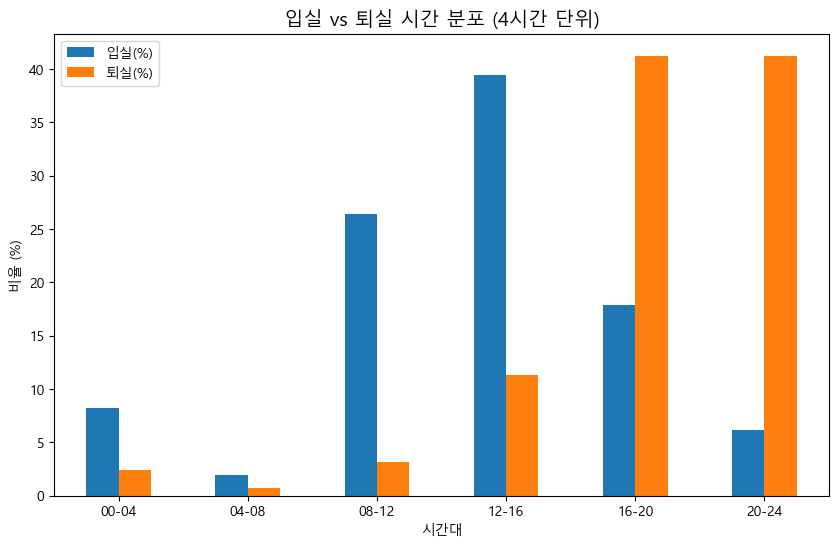

In [ ]:
# 분포 데이터 (이미 구해둔 enter_dist, leave_dist 활용)
enter_dist = get_distribution(df_final['enter_bin'])
leave_dist = get_distribution(df_final['leave_bin'])

# 두 분포 합치기 (비교용 DataFrame)
compare_df = pd.DataFrame({
    '입실(%)': enter_dist['percent'],
    '퇴실(%)': leave_dist['percent']
})

# 시각화
compare_df.plot(kind='bar', figsize=(10,6))
plt.title("입실 vs 퇴실 시간 분포 (4시간 단위)", fontsize=14)
plt.ylabel("비율 (%)")
plt.xlabel("시간대")
plt.xticks(rotation=0)
plt.legend()
plt.show()